<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7

Logistic Regression

    Height  Weight  Age
0       72     160   17
1       64     174   18
2       75     187   23
3       46     110   12
4       70     200   33
5       63     197   24
6       65     180   19
7       73     178   32
8       71     159   14
9       67     146   18
10      76     193   18
11      63     186   19
12      65     201   21
13      64     199   23
14      63     163   28
15      63     210   35
16      69     176   24
17      49     117   12
18      78     230   44
19      71     235   24
20      73     210   26
21      65     193   28
22      70     189   23
23      69     185   22
24      69     194   18
25      65     167   17
26      66     153   32
27      68     198   44
28      63     192   18
29      70     167   13


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:  0.125


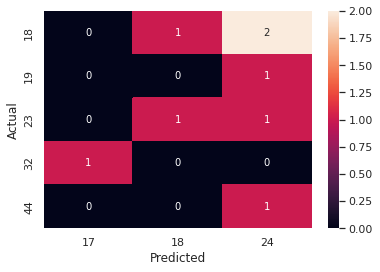

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
dataset = ('/Data.xlsx')
candidates = {'Height': [72,64,75,46,70,63,65,73,71,67,76,63,65,64,63,63,69,49,78,71,73,65,70,69,69,65,66,68,63,70],
              'Weight': [160,174,187,110,200,197,180,178,159,146,193,186,201,199,163,210,176,117,230,235,210,193,189,185,194,167,153,198,192,167],
              'Age': [17,18,23,12,33,24,19,32,14,18,18,19,21,23,28,35,24,12,44,24,26,28,23,22,18,17,32,44,18,13]
              }

df = pd.DataFrame(candidates,columns= ['Height', 'Weight','Age'])
print (df)
X = df[['Height', 'Weight']]
y = df['Age']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

K-Means

In [33]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[4, 17], [6, 4], [1, -4],[11, 1], [12, 2], [32, -6]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[ 6.8,  4. ],
       [32. , -6. ]])

Support Vector Machines

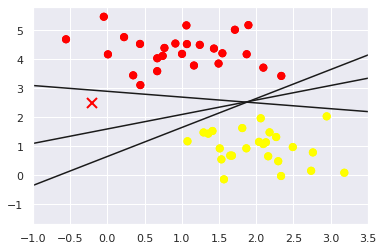

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-2, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([-.2], [2.5], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Artificial Neural Networks

[[0.22312305]]  - Correct:  3
[[0.04763575]]  - Correct:  0


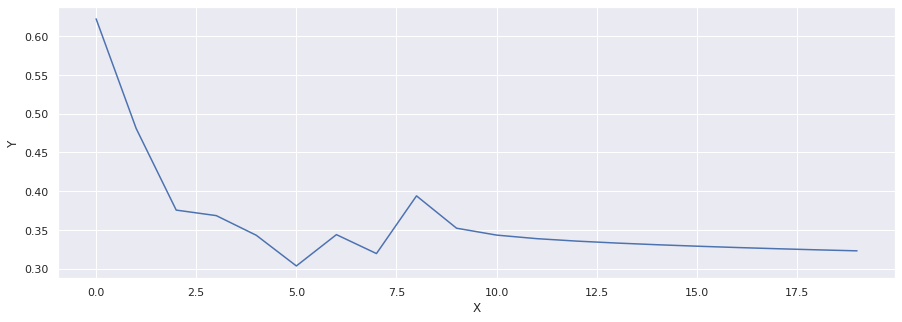

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# create an array we can use for our Neural Networks
inputs = np.array([[0, 2, 0],
                   [3, 1, 1],
                   [2, 0, 5],
                   [1, 0, 0],
                   [1, 1, 17],
                   [-3, 0, 1]])

outputs = np.array([[0], [0], [0], [1], [1], [1]])

# we create a class for the Neural Network with initialized variables that will allow us to show it on a graph
class NeuralNetwork:

    def __init__(mat, inputs, outputs):
        mat.inputs  = inputs
        mat.outputs = outputs
        mat.weights = np.array([[.50], [.50], [.50]])
        mat.error_history = []
        mat.epoch_list = []

    def sigmoid(mat, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(mat):
        mat.hidden = mat.sigmoid(np.dot(mat.inputs, mat.weights))


    def backpropagation(mat):
        mat.error  = mat.outputs - mat.hidden
        delta = mat.error * mat.sigmoid(mat.hidden, deriv=True)
        mat.weights += np.dot(mat.inputs.T, delta)


    def train(mat, epoch=20):
        for epoch in range(epoch):

            mat.feed_forward()

            mat.backpropagation()    

            mat.error_history.append(np.average(np.abs(mat.error)))
            mat.epoch_list.append(epoch)

                             
    def predict(mat, new_input):
        prediction = mat.sigmoid(np.dot(new_input, mat.weights))
        return prediction

# create and train the Neural Network
NN = NeuralNetwork(inputs, outputs)
NN.train()

# test two examples                                  
example = np.array([[3, 1, 1]])
example_2 = np.array([[0, 2, 0]])

# print to two predictions for the examples                
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the graph
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()